In [77]:
import pandas as pd
import numpy as np
import prophet
from datetime import date
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
start = pd.to_datetime('2010-01-01')
end = date.today()

tickers_to_download = ['EURUSD=X', 'GBPUSD=X', 'USDCHF=X', 'USDJPY=X', 'EURJPY=X', 'USDCAD=X', 'AUDUSD=X']

forex_df_list = []

for ticker in tickers_to_download:
  ts = yf.download(ticker, start, end)['Close']
  ts = ts.rename(ticker.lower().split('=', 1)[0] + '_close')
  forex_df_list.append(ts)

forex_df = pd.concat(forex_df_list, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [79]:
forex_df

,eurusd_close,gbpusd_close,usdchf_close,usdjpy_close,eurjpy_close,usdcad_close,audusd_close
Date,,,,,,,
2010-01-01,1.438994,1.613294,1.03390,92.919998,133.710007,1.05120,0.898473
2010-01-04,1.442398,1.611370,1.02910,92.495003,133.389999,1.04100,0.912492
2010-01-05,1.436596,1.599079,1.03370,91.584999,131.529999,1.03950,0.911826
2010-01-06,1.440403,1.602384,1.02760,92.356003,133.013000,1.03190,0.920471
2010-01-07,1.431803,1.593397,1.03360,93.389999,133.748001,1.03400,0.917768
...,...,...,...,...,...,...,...
2024-05-29,1.085187,1.275836,0.91229,157.261993,170.654007,1.36460,0.664800
2024-05-30,1.080182,1.269799,0.91280,157.608002,170.216003,1.37170,0.661370
2024-05-31,1.083541,1.273042,0.90331,156.953003,169.996002,1.36833,0.663030


In [80]:
shifted_index = forex_df.index.shift(-14, freq='D')
shifted_index

forex_df.set_index(shifted_index, inplace=True)
forex_df

,eurusd_close,gbpusd_close,usdchf_close,usdjpy_close,eurjpy_close,usdcad_close,audusd_close
Date,,,,,,,
2009-12-18,1.438994,1.613294,1.03390,92.919998,133.710007,1.05120,0.898473
2009-12-21,1.442398,1.611370,1.02910,92.495003,133.389999,1.04100,0.912492
2009-12-22,1.436596,1.599079,1.03370,91.584999,131.529999,1.03950,0.911826
2009-12-23,1.440403,1.602384,1.02760,92.356003,133.013000,1.03190,0.920471
2009-12-24,1.431803,1.593397,1.03360,93.389999,133.748001,1.03400,0.917768
...,...,...,...,...,...,...,...
2024-05-15,1.085187,1.275836,0.91229,157.261993,170.654007,1.36460,0.664800
2024-05-16,1.080182,1.269799,0.91280,157.608002,170.216003,1.37170,0.661370
2024-05-17,1.083541,1.273042,0.90331,156.953003,169.996002,1.36833,0.663030


In [81]:
df_covid = pd.read_csv('./owid-covid-data.csv', parse_dates=['date'], index_col='date')
extra_df = pd.read_csv('./extra_regressors.csv', parse_dates=['DATE'])

In [82]:
df_covid_1 = df_covid[df_covid["continent"].isin(['North America', 'Europe'])]
df_covid_1

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2020-02-26,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2020-02-27,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2020-02-28,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2020-02-29,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
2021-05-17,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
2021-05-18,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


In [83]:
extra_df

,DATE,CPIAUCSL,GDP,T10YIE
0,1947-01-01,21.480,243.164,NaN
1,1947-01-02,21.480,243.164,NaN
2,1947-01-03,21.480,243.164,NaN
3,1947-01-04,21.480,243.164,NaN
4,1947-01-05,21.480,243.164,NaN
...,...,...,...,...
27164,2021-05-16,266.832,22048.894,2.51
27165,2021-05-17,266.832,22048.894,2.54
27166,2021-05-18,266.832,22048.894,2.52
27167,2021-05-19,266.832,22048.894,2.48


In [84]:
extra_df.set_index('DATE',inplace=True)
map_dict = {'CPIAUCSL':'consumer_price_index', 'GDP':'GDP_US', 'T10YIE':'inflation'}
extra_df = extra_df.rename(columns=map_dict)

extra_df

,consumer_price_index,GDP_US,inflation
DATE,,,
1947-01-01,21.480,243.164,NaN
1947-01-02,21.480,243.164,NaN
1947-01-03,21.480,243.164,NaN
1947-01-04,21.480,243.164,NaN
1947-01-05,21.480,243.164,NaN
...,...,...,...
2021-05-16,266.832,22048.894,2.51
2021-05-17,266.832,22048.894,2.54
2021-05-18,266.832,22048.894,2.52


In [85]:
df_final = df_covid_1.merge(forex_df, left_index=True, right_index=True).merge(extra_df, left_index=True, right_index=True)
df_final

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,eurusd_close,gbpusd_close,usdchf_close,usdjpy_close,eurjpy_close,usdcad_close,audusd_close,consumer_price_index,GDP_US,inflation
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.139796,1.307531,0.92836,103.112000,117.516998,1.36580,0.659800,258.824,21561.139,1.53
2020-02-26,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.131651,1.290972,0.93681,105.026001,118.830002,1.37318,0.649910,258.824,21561.139,1.54
2020-02-27,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.126152,1.281821,0.93895,104.550003,117.733002,1.37730,0.647940,258.824,21561.139,1.53
2020-02-28,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.118493,1.257024,0.94465,104.610001,116.984001,1.39428,0.627412,258.824,21561.139,1.41
2020-03-02,ALB,Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115536,1.239987,0.94630,106.688004,119.002579,1.37978,0.617768,257.989,21561.139,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,1.219319,1.420374,0.89705,109.808998,133.888000,1.20702,0.774250,266.832,22048.894,2.51
2021-05-17,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,1.219007,1.418037,0.90011,109.906998,133.968002,1.20778,0.771010,266.832,22048.894,2.54
2021-05-18,VAT,Europe,Vatican,27.0,0.0,0.0,NaN,NaN,0.0,33374.536,...,1.223287,1.422678,0.89840,109.492996,133.938995,1.20607,0.774350,266.832,22048.894,2.52


In [86]:
df_europe = df_final[df_final['continent'] == 'Europe']['new_cases'].to_frame()
df_europe.rename(columns={"new_cases": "new_cases_europe"}, inplace=True)
df_europe

,new_cases_europe
date,
2020-02-25,NaN
2020-02-26,NaN
2020-02-27,NaN
2020-02-28,NaN
2020-03-02,NaN
...,...
2021-05-14,0.0
2021-05-17,0.0
2021-05-18,0.0


In [91]:
df_america = df_final[df_final['continent'] == 'North America']['new_cases'].to_frame()
df_america.rename(columns={"new_cases": "new_cases_america"}, inplace=True)
df_america

,new_cases_america
date,
2021-02-04,NaN
2021-02-05,NaN
2021-02-08,NaN
2021-02-09,NaN
2021-02-10,NaN
...,...
2021-05-14,42298.0
2021-05-17,28666.0
2021-05-18,27819.0


In [101]:
df_selected = df_final[['eurusd_close', 'consumer_price_index', 'GDP_US', 'inflation']].drop_duplicates()
df_selected

,eurusd_close,consumer_price_index,GDP_US,inflation
date,,,,
2020-02-25,1.139796,258.824,21561.139,1.53
2020-02-26,1.131651,258.824,21561.139,1.54
2020-02-27,1.126152,258.824,21561.139,1.53
2020-02-28,1.118493,258.824,21561.139,1.41
2020-03-02,1.115536,257.989,21561.139,1.41
...,...,...,...,...
2020-01-17,1.102913,258.687,21561.139,1.75
2020-01-20,1.108979,258.687,21561.139,1.75
2020-01-21,1.106293,258.687,21561.139,1.74


In [102]:
df_final_1 = df_selected.merge(df_europe, left_index=True, right_index=True)
df_final_1

,eurusd_close,consumer_price_index,GDP_US,inflation,new_cases_europe
date,,,,,
2020-02-25,1.139796,258.824,21561.139,1.53,NaN
2020-02-25,1.139796,258.824,21561.139,1.53,2.0
2020-02-25,1.139796,258.824,21561.139,1.53,0.0
2020-02-25,1.139796,258.824,21561.139,1.53,1.0
2020-02-25,1.139796,258.824,21561.139,1.53,NaN
...,...,...,...,...,...
2020-02-03,1.084175,258.824,21561.139,1.63,NaN
2020-02-03,1.084175,258.824,21561.139,1.63,0.0
2020-02-03,1.084175,258.824,21561.139,1.63,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

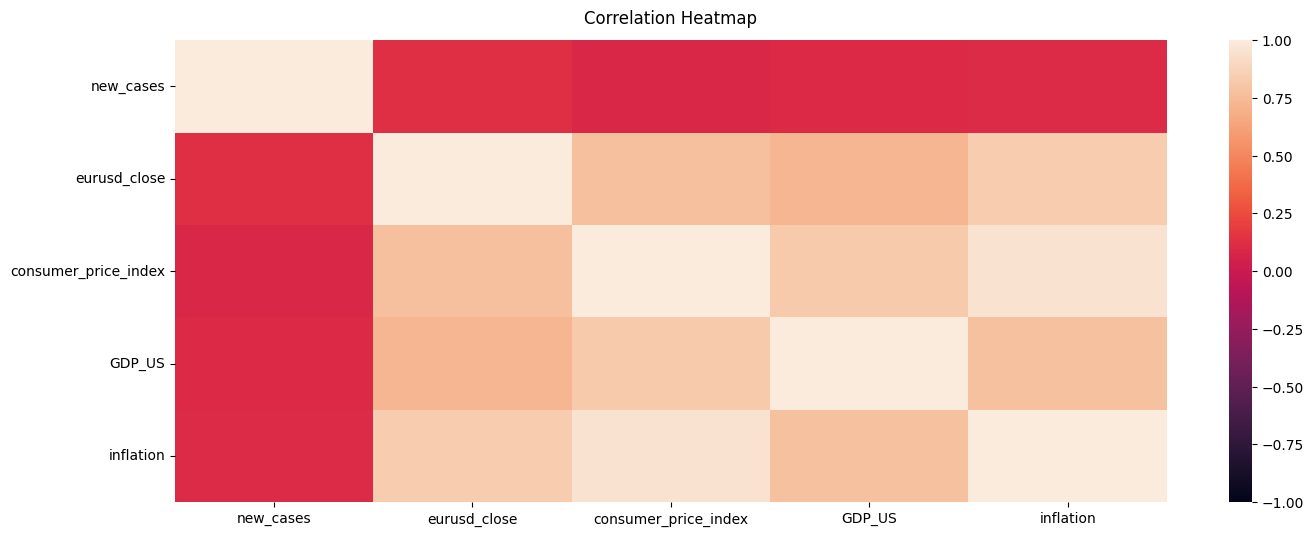

In [45]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_selected.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)